<a href="https://colab.research.google.com/github/Chaitanya-Gumudala-1710/deep_learning/blob/main/stochastic_vs_batch_vs_mini_batch_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/deep-learning/Datasets/homeprices_banglore.csv")

In [3]:
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

In [4]:
scaled_x = sx.fit_transform(data.drop('price', axis='columns'))

In [5]:
scaled_y = sy.fit_transform(data['price'].values.reshape(data.shape[0], 1))

In [6]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
  number_of_features = X.shape[1]
  w = np.ones(number_of_features)
  b = 0
  total_samples = X.shape[0]
  cost_list = []
  epoch_list = []
  for i in range(epochs):
    y_predicted = np.dot(w, X.T) + b
    w_grad = -(2/total_samples) * (X.T.dot(y_true - y_predicted))
    b_grad = -(2/total_samples) * np.sum(y_true - y_predicted)
    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad
    cost = np.mean(np.square(y_true - y_predicted))
    if i % 10 == 0:
      cost_list.append(cost)
      epoch_list.append(i)
  return w, b, cost, cost_list, epoch_list

In [7]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 500)

In [8]:
w

array([0.70712464, 0.67456527])

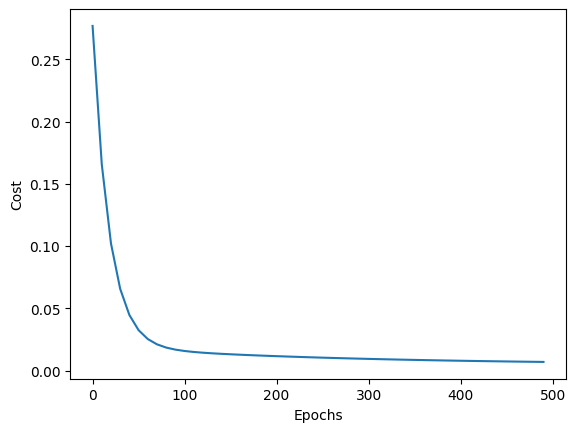

In [9]:
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.plot(epoch_list, cost_list)
plt.show()

In [10]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
  number_of_features = X.shape[1]
  w = np.ones(number_of_features)
  b = 0
  total_samples = X.shape[0]
  cost_list = []
  epoch_list = []
  for i in range(epochs):
    random_index = random.randint(0, total_samples-1)
    sample_x = X[random_index]
    sample_y = y_true[random_index]
    y_predicted = np.dot(w, sample_x.T) + b
    w_grad = -(2/total_samples) * (sample_x.T.dot(sample_y - y_predicted))
    b_grad = -(2/total_samples) * np.sum(sample_y - y_predicted)
    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad
    cost = np.mean(np.square(sample_y - y_predicted))
    if i % 100 == 0:
      cost_list.append(cost)
      epoch_list.append(i)
  return w, b, cost, cost_list, epoch_list

In [11]:
w_sgd, b_sdg, cost_sdg, cost_list_sdg, epoch_list_sdg = stochastic_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 10000)

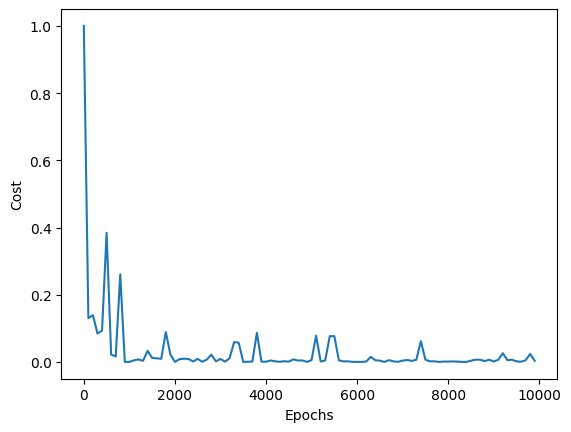

In [12]:
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.plot(epoch_list_sdg, cost_list_sdg)
plt.show()

In [13]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    if batch_size > total_samples:
        batch_size = total_samples
    cost_list = []
    epoch_list = []
    num_batches = int(total_samples/batch_size)
    for i in range(epochs):
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj - y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj - y_predicted)
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
            cost = np.mean(np.square(yj - y_predicted))
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

In [14]:
w_mbgd, b_mbdg, cost_mbdg, cost_list_mbdg, epoch_list_mbdg = mini_batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],), epochs = 120, batch_size = 5)

In [15]:
w_mbgd

array([0.70999164, 0.67814243])

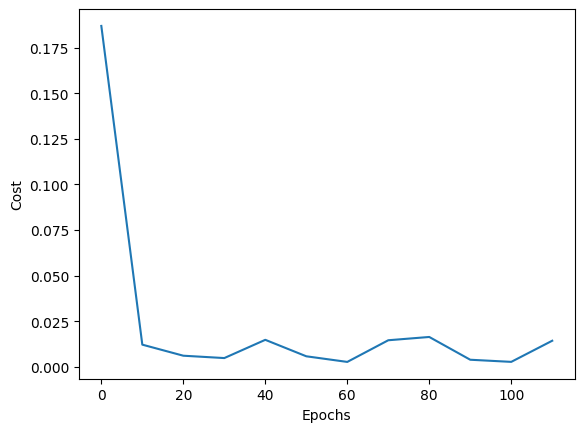

In [16]:
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.plot(epoch_list_mbdg, cost_list_mbdg)
plt.show()